In [1]:
import sys
sys.path.append('C:\\Users\\luoyan011\\Desktop\\PersonalLearning\\GitHub\\python_functions\\jl_nlp_pkg')
root_path = 'C:\\Users\\luoyan011\\Desktop\\PersonalLearning\\GitHub\\private_task\\coursera_nlp\\data'
import os
import pandas as pd
import re
import string
import warnings
import nlpbasic.textClean as TextProcessing
import nlpbasic.docVectors as DocVector
import nlpbasic.dataExploration as dataExploration
import nlpbasic.lda as lda
import nlpbasic.tfidf as tfidf

warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None
os.getcwd()
raw_data = pd.read_csv(os.path.join(root_path, "Course_Courseoverviews.csv"))

C:\Users\luoyan011\.conda\envs\nlp\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


## Laod Dataset

In [2]:
data = raw_data[raw_data.short_description.isnull()==False]
data['doc'] = data[['display_name', 'short_description']].agg('. '.join, axis=1)
data['base_course_id'] = data['course_id'].apply(lambda x: x.split('+')[1])
data = data.drop(columns = ['course_id', 'last_modified'])
data = data.drop_duplicates().reset_index()
data['index'] = data.index
data.head(5)

,index,display_name,short_description,doc,base_course_id
0,0,Mathematical Optimization for Business Problems,This course provides the necessary fundamental...,Mathematical Optimization for Business Problem...,CP0101EN
1,1,Accelerating Deep Learning with GPU,Majority of data in the world are unlabeled an...,Accelerating Deep Learning with GPU. Majority ...,ML0122ENv1
2,2,Controlling Hadoop Jobs Using Oozie,This short description is not used. The descri...,Controlling Hadoop Jobs Using Oozie. This shor...,BD0133EN
3,3,"Robots Are Coming! Build IoT Apps with Watson,...",Have fun with IoT and learn along the way. If ...,"Robots Are Coming! Build IoT Apps with Watson,...",ML0201EN
4,4,Deep Learning with TensorFlow - Beta,Majority of data in the world are unlabeled an...,Deep Learning with TensorFlow - Beta. Majority...,ML0121EN


In [3]:
raw_data.head(3)

,display_name,course_id,last_modified,short_description
0,Mathematical Optimization for Business Problems,course-v1:IBMDeveloperSkillsNetwork+CP0101EN+v1,19/02/2021 07:00:15,This course provides the necessary fundamental...
1,Accelerating Deep Learning with GPU,course-v1:CognitiveClass+ML0122ENv1+18W2018,19/02/2021 07:00:17,Majority of data in the world are unlabeled an...
2,Controlling Hadoop Jobs Using Oozie,course-v1:BigDataUniversity+BD0133EN+2017,20/02/2021 21:15:03,This short description is not used. The descri...


## Create Tokens

In [4]:
data['doc_tokens'] = TextProcessing.pipeline(data['doc'].to_list(), multi_gram = [1,2], lower_case=True, deacc=False, encoding='utf8',
                                           errors='strict', stem_lemma = '', tag_drop = ['J'], nltk_stop=True, stop_word_list=[], 
                                           check_numbers=False, word_length=0, remove_consecutives=True)
testtoken = DocVector.get_vocab(data.doc_tokens.to_list())

## Generate tfidf data, top 30/50 tfidf tokens

In [17]:
processed_doc = TextProcessing.pipeline(data['doc'].to_list(), multi_gram = [1,2], lower_case=True, deacc=False, encoding='utf8',
                                           errors='strict', stem_lemma = 'lemma', tag_drop = ['J'], nltk_stop=True, stop_word_list=['course','courses'], 
                                           check_numbers=False, word_length=0, remove_consecutives=True)

C:\Users\luoyan011\.conda\envs\nlp\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\luoyan011\.conda\envs\nlp\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


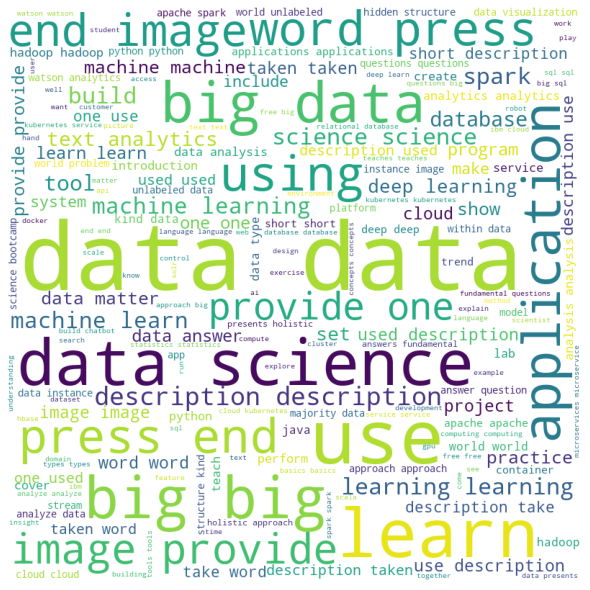

In [18]:
dataExploration.generate_word_cloud(processed_doc)

In [6]:
tfidf_value_data = tfidf.get_tfidf_dataframe(processed_doc)
to30_tfidf_bow = tfidf.get_top_n_tfidf_bow(processed_doc, top_n_tokens = 30)
to50_tfidf_bow = tfidf.get_top_n_tfidf_bow(processed_doc, top_n_tokens = 50)

In [7]:
to30_tfidf_bow

['introduction',
 'hadoop',
 'statistics',
 'analytics',
 'computing',
 'microservices',
 'databases',
 'spark',
 'r',
 'python',
 'kubernetes',
 'big data',
 'service',
 'node',
 'students',
 'ibm',
 'deep learning',
 'tools',
 'database',
 'applications',
 'chatbot',
 'text analytics',
 'watson',
 'cloud',
 'data analysis',
 'science',
 'data science',
 'ai',
 'application',
 'build']

## Generate recommand course list given key words

In [8]:
tfidf_value_data.head(3)

,doc_id,bow,tfidf_value
0,0,business,0.509325
1,0,fundamentals,0.433020
2,0,problems,0.404817


In [9]:
selected_words = ['r']
filter_data = tfidf_value_data[tfidf_value_data.bow.isin(selected_words)]
test = dataExploration.get_similarity_cosin(tfidf_value_data, filter_data, ['doc_id','bow'], doc_key = 'doc_id', comp_col = 'tfidf_value', topn_output = 10)
recommend_course = data[data.index.isin(test.doc_key.to_list())].display_name.to_list()
recommend_course 

['Data Science Bootcamp with R for University Proffesors',
 'Using R with Databases',
 'R 101',
 'Analyzing Big Data in R using Apache Spark',
 'Using R with Databases',
 'Using R with Databases',
 'R 101',
 'Machine learning with Apache SystemML',
 'Data Analysis using R 101',
 'Data Visualization with R']

## Build LDA Model

In [10]:
lda_allbow, bow_corpus, dictionary = lda.fit_lda(processed_doc, num_topics = 5)
lda_top30bow, bow_corpus, dictionary  = lda.fit_lda(processed_doc, top_n_tokens = 30, num_topics = 5)
lda_top50bow, bow_corpus, dictionary  = lda.fit_lda(processed_doc, top_n_tokens = 30, num_topics = 5)

In [11]:
lda.lda_topics(lda_top30bow)

,Topics,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10
0,1,cloud,data science,science,kubernetes,applications,service,introduction,python,ibm,application
1,2,r,deep learning,hadoop,statistics,data analysis,databases,microservices,database,introduction,big data
2,3,spark,databases,python,build,database,node,introduction,application,analytics,r
3,4,big data,spark,science,data science,computing,applications,analytics,tools,ibm,text analytics
4,5,analytics,watson,text analytics,science,data science,build,chatbot,ai,tools,students


In [12]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [13]:
lda_allbow, bow_corpus, dictionary = lda.fit_lda(processed_doc, num_topics = 5)
vis = gensimvis.prepare(lda_allbow, bow_corpus, dictionary)
vis

C:\Users\luoyan011\.conda\envs\nlp\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.218222  0.123068       1        1  29.392958
4     -0.147450 -0.043439       2        1  29.021023
0     -0.137474  0.073078       3        1  15.783310
2     -0.060697  0.019991       4        1  14.926810
1      0.127399 -0.172697       5        1  10.875899, topic_info=                  Term       Freq      Total Category  logprob  loglift
96            big data  44.000000  44.000000  Default  30.0000  30.0000
170              spark  28.000000  28.000000  Default  29.0000  29.0000
72               using  42.000000  42.000000  Default  28.0000  28.0000
98                   r  26.000000  26.000000  Default  27.0000  27.0000
28            learning  52.000000  52.000000  Default  26.0000  26.0000
..                 ...        ...        ...      ...      ...      ...
54         description   3.375411  38.549095   Topic5  -4.3150  -0.2168
55   description taken   1.732565  19.745273   Topic5  -4.9820  -0.2147
70                used   3.200610  46.599842   Topic5  -4.3682  -0.4596
63            one used   1.717030  19.751994   Topic5  -4.9910  -0.2240
28            learning   2.708757  52.896196   Topic5  -4.5351  -0.7532

[224 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
101       1  0.109718           access
101       2  0.109718           access
101       3  0.109718           access
101       4  0.658306           access
151       1  0.104914         analysis
...     ...       ...              ...
50        5  0.061017            world
51        2  0.832940   world problems
51        3  0.138823   world problems
52        2  0.829313  world unlabeled
52        3  0.138219  world unlabeled

[422 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 1, 3, 2])